In [3]:
#1do the neccesary imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import normalization_file

In [4]:
#2import dataset and specification
data = pd.read_csv("Ecommerce Customers.csv") 
#print(data.head(5))

data_num = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]
data_cat = data[["Email","Address"]]

data_num_norm = normalization_file.data_num_norm_normfile

x= data_num_norm.iloc[:,[3,4]].values

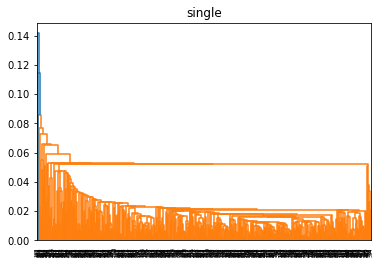

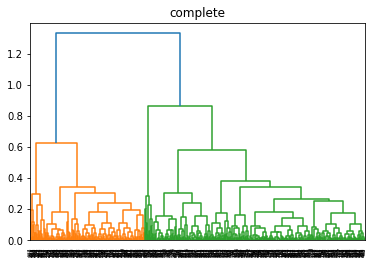

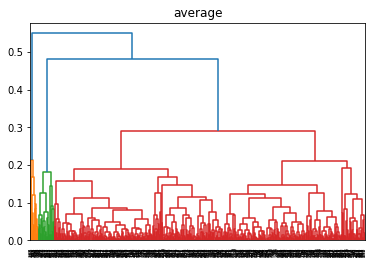

In [8]:
#3using the denrogram to find optimal number of clusters 

counter=['single', 'complete', 'average'] #list for distance methods

for i in counter: #order: single, complete, average 
    dendrogram = sch.dendrogram(sch.linkage(x, method=i))
    plt.title(i)
    plt.show()

In [6]:
#4fitting hierarchical clustering to the dataset 
hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='ward')
y_hc= hc.fit_predict(x)

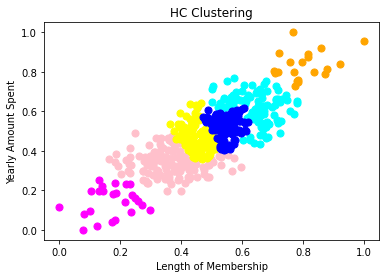

In [7]:
#5visualize clusters 

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = "yellow")
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_hc == 5, 0], x[y_hc == 5, 1], s = 50, c = 'blue')

plt.title("HC Clustering")
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")

plt.show()